In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Basic Data Exploration

In [3]:
df.shape

(614, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
obj_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=['number']).columns

### Categorical Features

#### Observations:
- `Loan_ID` should be dropped.
- `Gender`, `Married`, `Dependents`, `Self_Employed` has missing values.
- Dataset is imbalanced

In [6]:
df[obj_cols].describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [7]:
df[obj_cols].isnull().sum()

Loan_ID           0
Gender           13
Married           3
Dependents       15
Education         0
Self_Employed    32
Property_Area     0
Loan_Status       0
dtype: int64

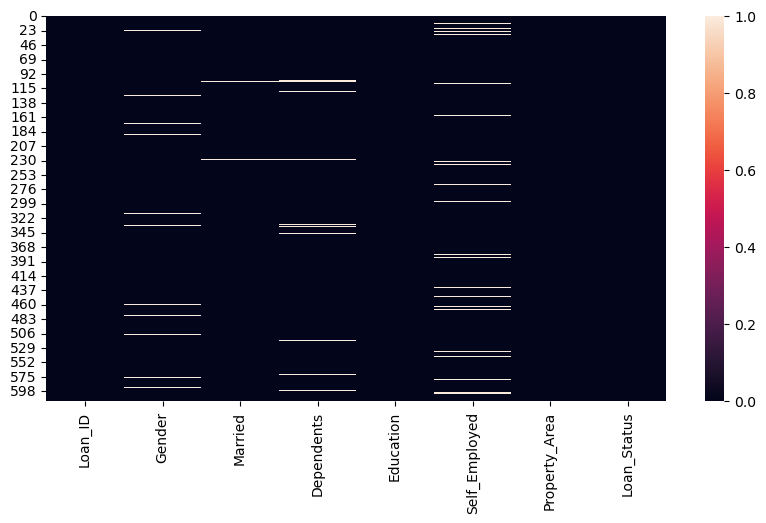

In [8]:
plt.figure(figsize=(10,5))
sns.heatmap(df[obj_cols].isnull())
plt.show()

In [9]:
for col in obj_cols:
    print(df[col].value_counts())
    print('-' * 30)
    print('Number of unique values: ',df[col].nunique())
    print('*' * 20)
    print('*' * 20)

Loan_ID
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: count, Length: 614, dtype: int64
------------------------------
Number of unique values:  614
********************
********************
Gender
Male      489
Female    112
Name: count, dtype: int64
------------------------------
Number of unique values:  2
********************
********************
Married
Yes    398
No     213
Name: count, dtype: int64
------------------------------
Number of unique values:  2
********************
********************
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64
------------------------------
Number of unique values:  4
********************
********************
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64
------------------------------
Number of unique values:  2
********************
********************
Self_Employed
No     5

In [10]:
def countplot(col):
    sns.countplot(df[obj_cols], x=col, hue='Loan_Status')
    plt.show()

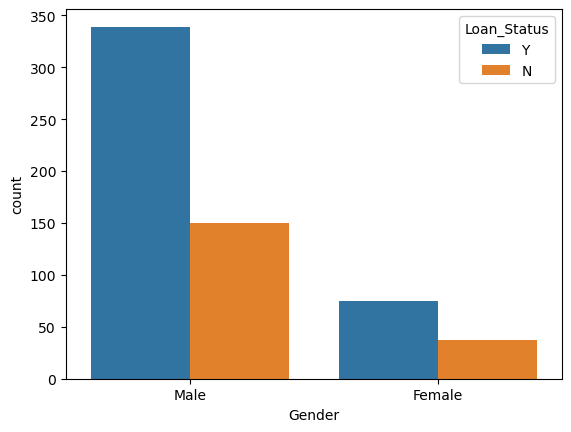

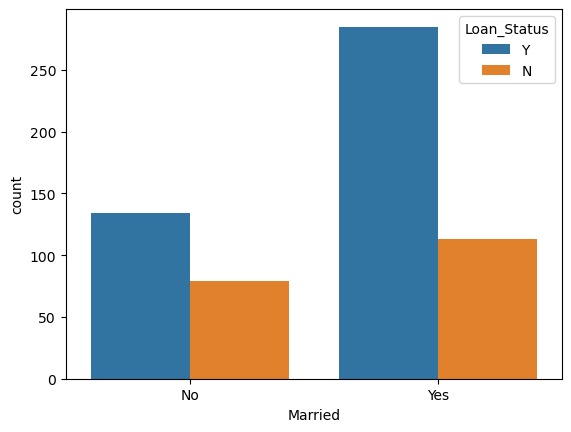

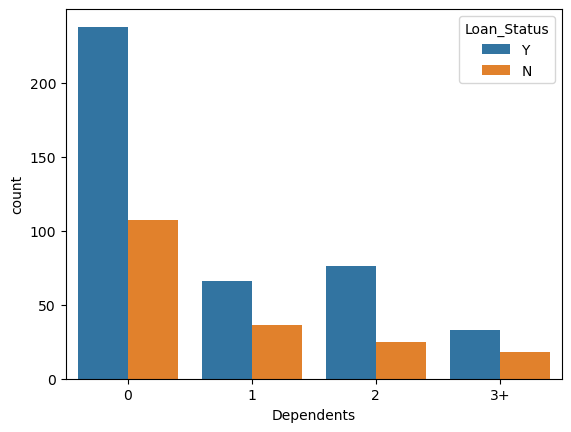

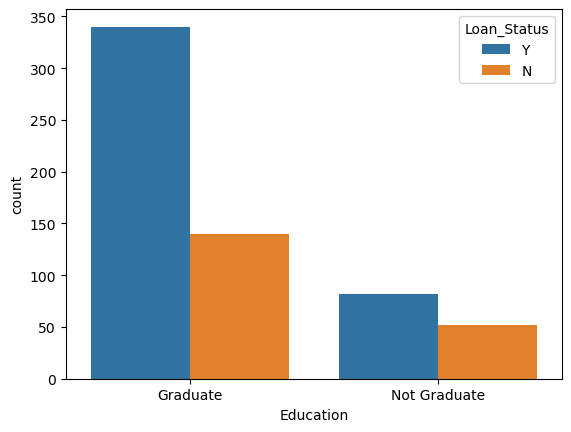

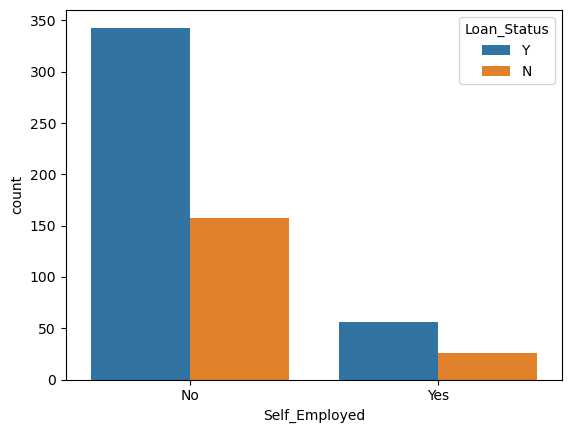

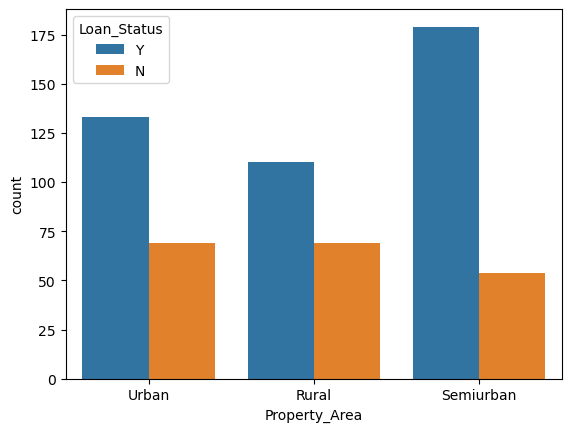

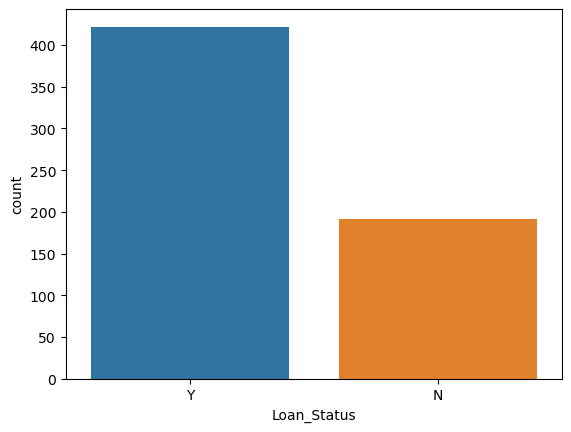

In [11]:
for col in obj_cols[1:]:
    countplot(col)

### Numerical Features

#### Observations:
- `Loan Amount`, `Loan_Amount_Term` and `Credit History` has missing values.
- `Loan Amount Term` and `Credit_History` cols are actually categorical variable
- `ApplicantIncome`, `CoapplicantIncome`, `LoanAmount` cols are right skewed.

In [12]:
df[num_cols]

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


In [13]:
df[num_cols].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [14]:
for col in num_cols:
    print(df[col].value_counts())
    print('-' * 30)
    print('Number of unique values: ',df[col].nunique())
    print('*' * 20)
    print('*' * 20)

ApplicantIncome
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: count, Length: 505, dtype: int64
------------------------------
Number of unique values:  505
********************
********************
CoapplicantIncome
0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: count, Length: 287, dtype: int64
------------------------------
Number of unique values:  287
********************
********************
LoanAmount
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: count, Length: 203, dtype: int64
------------------------------
Number of unique values:  203
********************
********************
Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2

In [15]:
def histplot(col):
    sns.histplot(df[num_cols], x=col)
    plt.show()

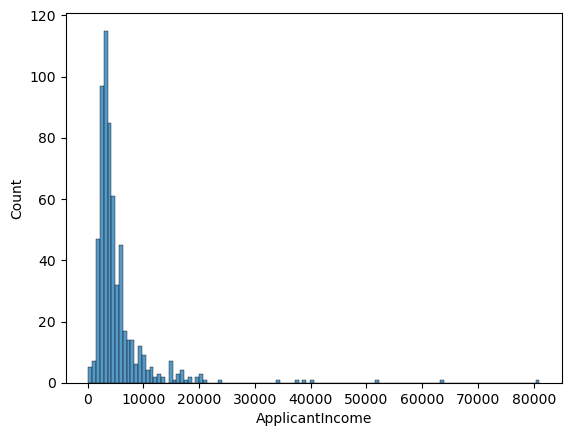

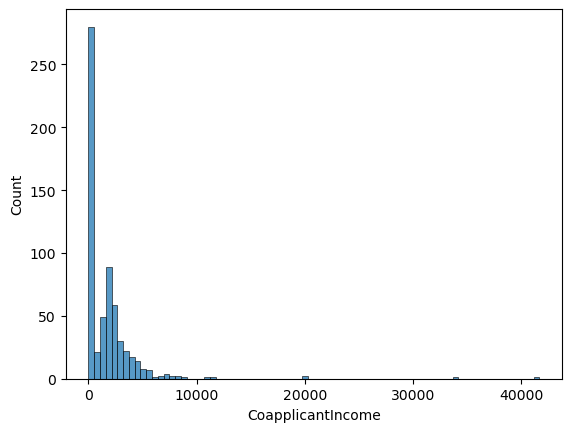

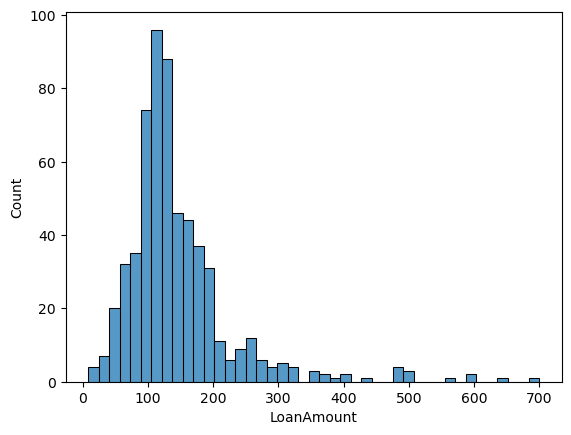

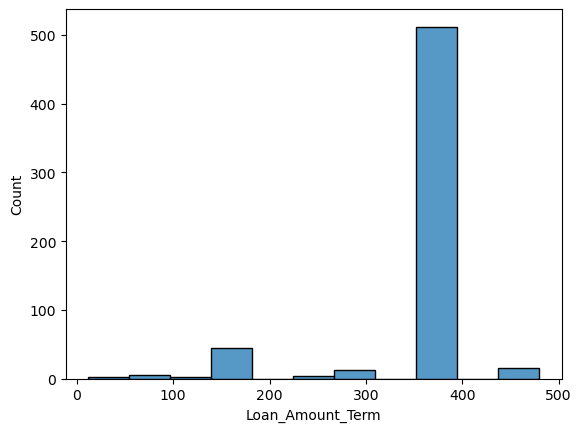

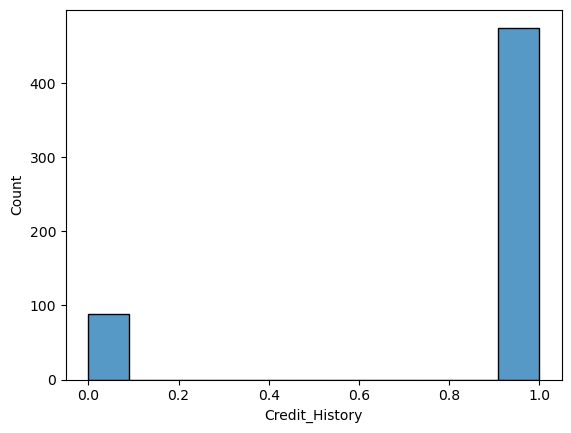

In [16]:
for col in num_cols:
    histplot(col)

### Other Analysis

#### Observations:
- `ApplicantIncome` and `LoanAmount` cols are highly correlated.
- `ApplicantIncome`, `CoapplicantIncome` and `LoanAmount` cols have outliers.

In [17]:
correlation_matrix = df.corr(numeric_only=True)

<Axes: >

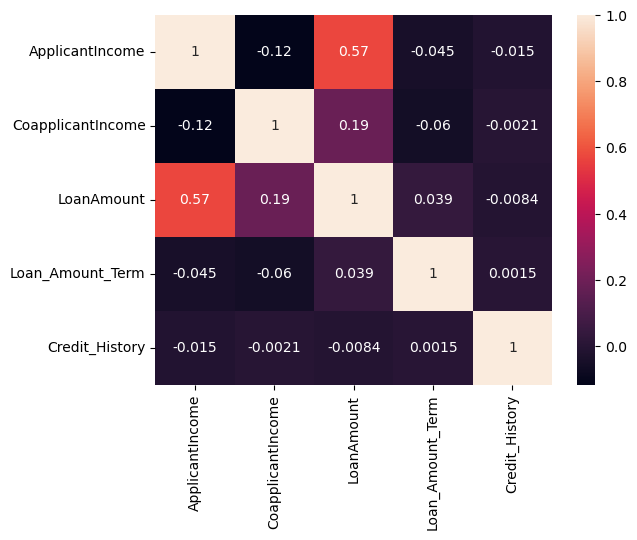

In [18]:
sns.heatmap(correlation_matrix, annot=True)

In [19]:
def boxplot(col):
    sns.boxplot(df, x=col, y='Loan_Status')
    plt.show()

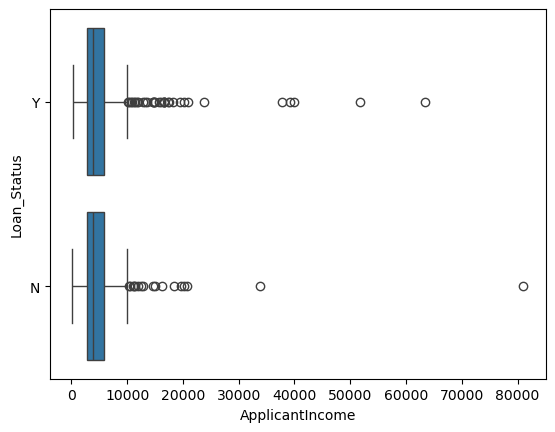

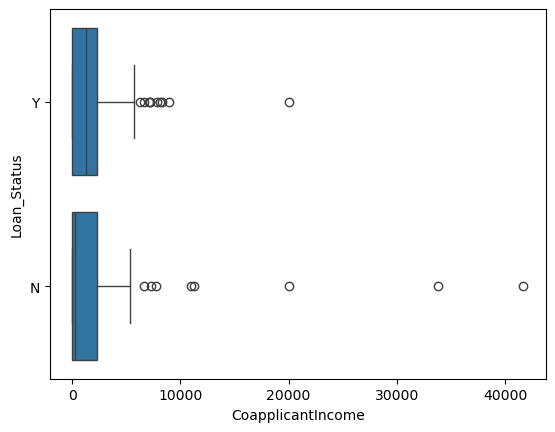

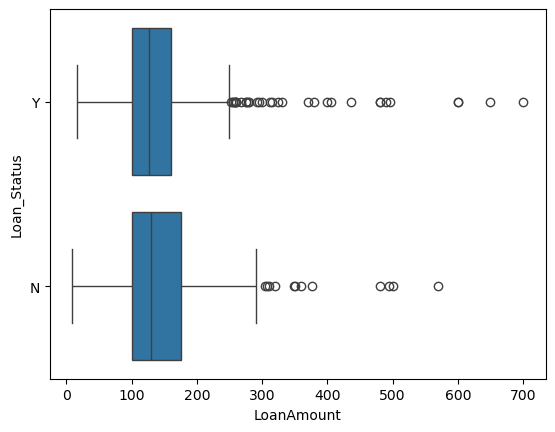

In [20]:
for col in num_cols[:3]:
    boxplot(col)

### Data Preprocessing

In [21]:
# Drop Unnecessary Column
df = df.drop(columns={'Loan_ID'})

In [22]:
# Missing Value Treatment
cat_missing_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History']

In [23]:
for col in cat_missing_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [24]:
df['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [25]:
df['Dependents'] = df['Dependents'].replace(['0', '1', '2', '3+'],['None', 'One', 'Two', 'More than two'])

In [26]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].astype('int')

In [27]:
df['Credit_History'] = df['Credit_History'].astype('int')

In [28]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

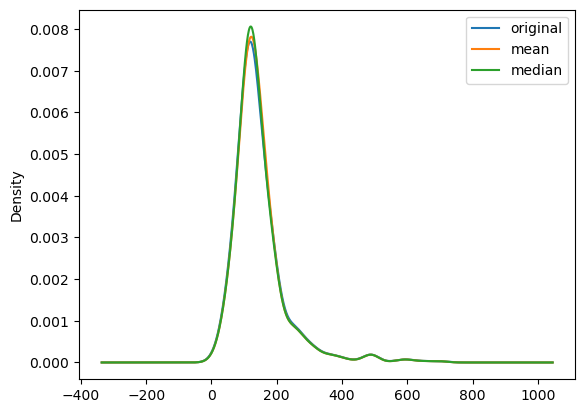

In [29]:
df['LoanAmount'].plot(kind='kde', label='original')
df['LoanAmount'].fillna(df['LoanAmount'].mean()).plot(kind='kde', label='mean')
df['LoanAmount'].fillna(df['LoanAmount'].median()).plot(kind='kde', label='median')
plt.legend()

#### Observations:
- `LoanAmount` col can be filled with mean values. Mean value doesn't change the distribution much.

In [30]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

In [31]:
# Outlier Treatment
def outlier_treatment(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    IQR = Q3 - Q1

    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR

    df[col] = np.where(df[col] > upper_limit, upper_limit,
                         np.where(df[col] < lower_limit, lower_limit,
                                     df[col]))

In [32]:
out_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
for col in out_cols:
    outlier_treatment(col)

In [33]:
# Skewness Treatment
df['ApplicantIncome'] = np.sqrt(df['ApplicantIncome'])
df['CoapplicantIncome'] = np.sqrt(df['CoapplicantIncome'])
df['LoanAmount'] = np.sqrt(df['LoanAmount'])

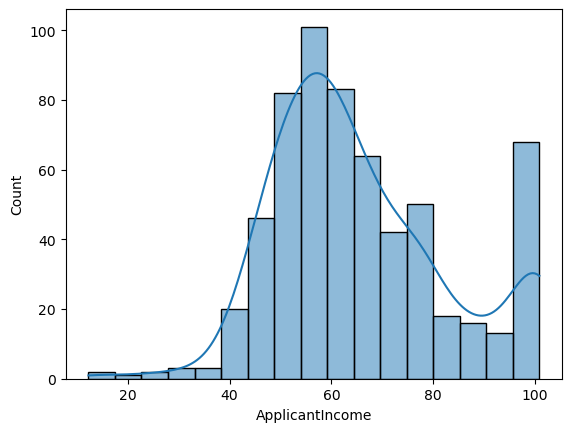

In [34]:
sns.histplot(df, x='ApplicantIncome', kde=True)
plt.show()

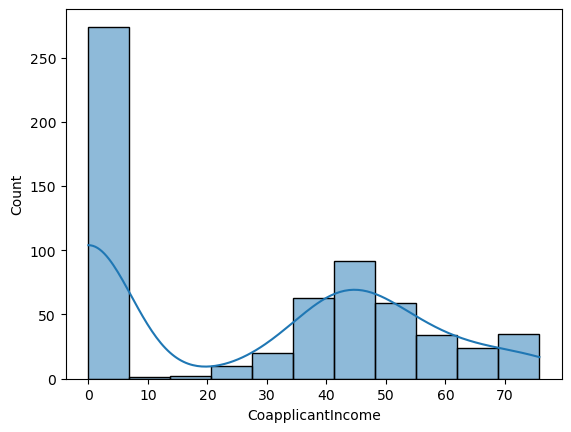

In [35]:
sns.histplot(df, x='CoapplicantIncome', kde=True)
plt.show()

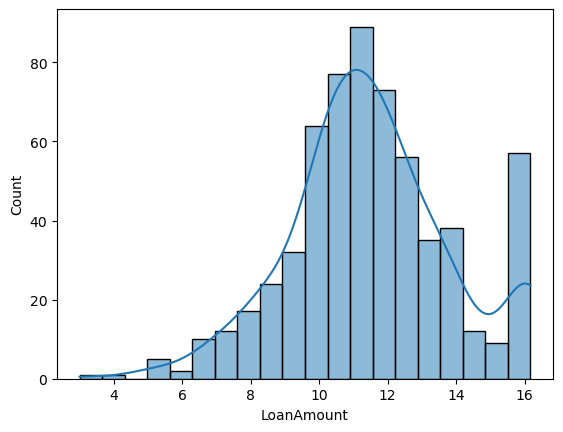

In [36]:
sns.histplot(df, x='LoanAmount', kde=True)
plt.show()

### Dataset Splitting and Feature Engineering

In [37]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [39]:
y = le.fit_transform(y)

### Train-Test Splitting and Model Building

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, stratify=y, random_state=42)

### Model Building

In [41]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score, ConfusionMatrixDisplay
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [42]:
ct = ColumnTransformer([
    ('ohe', OneHotEncoder(sparse_output=False, drop='first'),['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']),
    ('mnmx', MinMaxScaler(), ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'])
], remainder='passthrough')

In [43]:
X_train_temp = ct.fit_transform(X_train)
X_test_temp = ct.transform(X_test)

In [44]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gdbt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [45]:
clfs = {
    'SVC': svc,
    'KN': knc,
    'GNB': gnb,
    'MNB': mnb,
    'BNB': bnb,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'Bgc': bc,
    'ETC': etc,
    'GBDT': gdbt,
    'xgb': xgb
}

In [46]:
def train_classifier(clf):
    clf.fit(X_train_temp, y_train)
    y_pred = clf.predict(X_test_temp)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    return accuracy, precision

In [47]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf)

    print("For", name)
    print("Accuracy - ", current_accuracy)
    print("Precision - ", current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For SVC
Accuracy -  0.6991869918699187
Precision -  0.6967213114754098
For KN
Accuracy -  0.7886178861788617
Precision -  0.7864077669902912
For GNB
Accuracy -  0.8536585365853658
Precision -  0.8316831683168316
For MNB
Accuracy -  0.7073170731707317
Precision -  0.7024793388429752
For BNB
Accuracy -  0.8536585365853658
Precision -  0.8316831683168316
For LR
Accuracy -  0.8536585365853658
Precision -  0.8316831683168316
For RF
Accuracy -  0.8292682926829268
Precision -  0.8555555555555555
For AdaBoost
Accuracy -  0.8211382113821138
Precision -  0.8315789473684211
For Bgc
Accuracy -  0.8048780487804879
Precision -  0.8351648351648352
For ETC
Accuracy -  0.7886178861788617
Precision -  0.8241758241758241
For GBDT
Accuracy -  0.8373983739837398
Precision -  0.8282828282828283
For xgb
Accuracy -  0.8048780487804879
Precision -  0.8505747126436781


In [48]:
performance_df = pd.DataFrame({'Algorithm': clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision', ascending=False)

In [49]:
performance_df = pd.melt(performance_df, id_vars='Algorithm')

In [50]:
performance_df

,Algorithm,variable,value
0,RF,Accuracy,0.829268
1,xgb,Accuracy,0.804878
2,Bgc,Accuracy,0.804878
3,GNB,Accuracy,0.853659
4,BNB,Accuracy,0.853659
5,LR,Accuracy,0.853659
6,AdaBoost,Accuracy,0.821138
7,GBDT,Accuracy,0.837398
8,ETC,Accuracy,0.788618
9,KN,Accuracy,0.788618


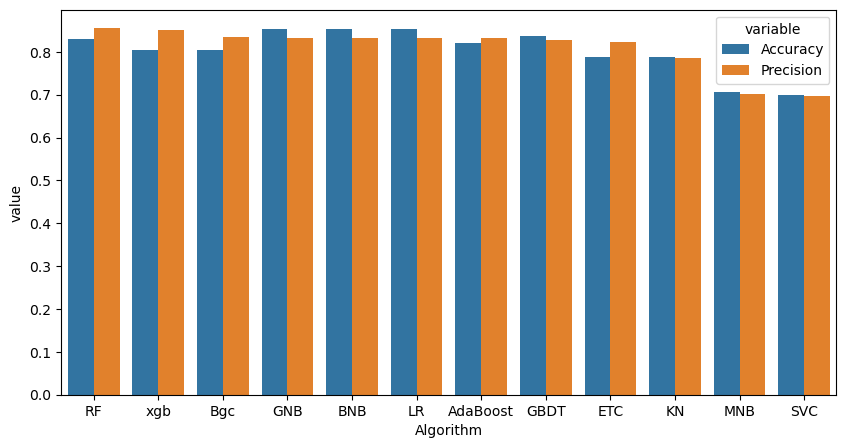

In [51]:
plt.figure(figsize=(10,5))
sns.barplot(performance_df, x='Algorithm', y='value', hue='variable')
plt.show()

### Improving Raandom Forest

In [52]:
#from sklearn.model_selection import GridSearchCV

In [53]:
parameters = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [9, 12, 15, None],
    'bootstrap': [True, False],
    'oob_score': [True, False],
    'max_features': ['sqrt', 'log2', None],
    'random_state': [2, 42]
}

In [ ]:
grid = GridSearchCV(RandomForestClassifier(), param_grid=parameters, cv = 3, scoring='precision')

In [ ]:
grid.fit(X_train, y_train)

In [ ]:
grid.best_params_

In [57]:
rf = Pipeline([
    ('ct', ct),
    ('model', RandomForestClassifier(n_estimators=200, max_depth=9, max_features='sqrt', oob_score=True, random_state=2))
])

In [58]:
rf.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'Property_Area']),
                                                 ('mnmx', MinMaxScaler(),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term'])])),
                ('model',
                 RandomForestClassifier(max_depth=9, n_estimators=200,
                                        oob_score=True, random_state=2))])

In [59]:
y_pred = rf.predict(X_test)

In [60]:
cm = confusion_matrix(y_pred, y_test)

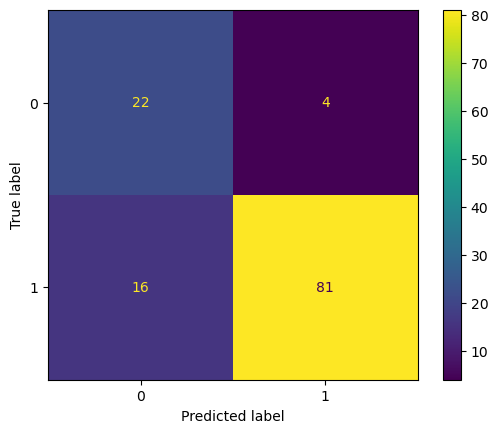

In [61]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rf.classes_)
disp.plot()

In [62]:
print('Accuracy: ', accuracy_score(y_pred, y_test))
print('Precision: ', precision_score(y_pred, y_test))
print('F1_score: ', f1_score(y_pred, y_test))

Accuracy:  0.8373983739837398
Precision:  0.9529411764705882
F1_score:  0.8901098901098901


### Observations:
- Since the data is imbalance, accuracy doesn't show us the actual picture.
- Precision is an important factor cause, the main aim is to reduce false positive. Model's precision score is high enough
- F1 score is also high.